In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Dataset Description:
- age: Age of the individual
- sex: Gender of the individual (0 = female, 1 = male)
- chest pain type: Type of chest pain (4 categories: 0-3)
- resting blood pressure: Resting blood pressure (in mm Hg)
- serum cholesterol: Cholesterol level (in mg/dl)
- fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
- maximum heart rate achieved
- exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment (0-2)
- number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
- thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
- target: Presence of heart disease (1 = Yes, 0 = No)



## Load and Explore the Data

In [4]:
df = pd.read_csv("heart_disease.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- sex, cp, fbs, restecg, exang, thal and target are categorical data.
- age, trestbps, chol, thalach, oldpeak, slope and ca are numerical data


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- age: Age of the patient (29–77 years).
- trestbps: Resting blood pressure (94–200 mmHg).
- chol: Serum cholesterol (126–564 mg/dl).
- thalach: Maximum heart rate achieved (71–202 bpm).
- oldpeak: ST depression induced by exercise relative to rest (0.0–6.2).
- slope: Slope of the peak exercise ST segment (0–2).
- ca: Number of major vessels colored by fluoroscopy (0–4).

In [12]:
 df.duplicated().sum()  #duplicate rows # no need to remove duplicates since it is a medical data.

723

In [13]:
df.columns.duplicated().sum() # duplicate columns

0

In [14]:
df.isna().sum() # checking missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There is no missing values in the dataset.

## Data Pre-processing and Exploratory Data Analysis


In [17]:
columns_to_check = ['sex', 'cp', 'restecg','thal','target']
for col in columns_to_check:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Value counts for thal:
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Value counts for target:
target
1    526
0    499
Name: count, dtype: int64



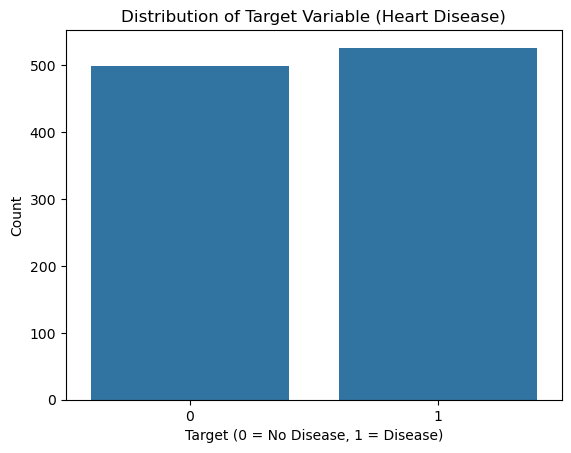

target
1    526
0    499
Name: count, dtype: int64


In [18]:
y= df["target"]

# Plotting the count plot to visualize the distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Printing the count of each class in the target variable
target_temp = df["target"].value_counts()
print(target_temp)


In [19]:
print("Percentage of patience without heart problems: ",(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: ",(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems:  48.68
Percentage of patience with heart problems:  51.32


In [20]:
sex_disease_status = df.groupby(['sex', 'target']).size().unstack(fill_value=0)
print(df['sex'].value_counts())
print(sex_disease_status)


sex
1    713
0    312
Name: count, dtype: int64
target    0    1
sex             
0        86  226
1       413  300


- Count of females with heart disease : 226
- Count of females without heart disease : 86
- Count of males with heart disease : 300
- Count of males without heart disease : 413

In [22]:
print("Percentage of female patience with heart problems: ",(round(sex_disease_status[1][0]*100/312,2)))
print("Percentage of female patience without heart problems: ",(round(sex_disease_status[0][0]*100/312,2)))
print("Percentage of male patience with heart problems: ",(round(sex_disease_status[1][1]*100/713,2)))
print("Percentage of male patience without heart problems: ",(round(sex_disease_status[0][1]*100/713,2)))

Percentage of female patience with heart problems:  72.44
Percentage of female patience without heart problems:  27.56
Percentage of male patience with heart problems:  42.08
Percentage of male patience without heart problems:  57.92


### Outlier Handling

In [24]:
num_df = df[["age", "trestbps", "chol", "thalach", "oldpeak", "slope", "ca"]]
num_df

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,52,125,212,168,1.0,2,2
1,53,140,203,155,3.1,0,0
2,70,145,174,125,2.6,0,0
3,61,148,203,161,0.0,2,1
4,62,138,294,106,1.9,1,3
...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0
1021,60,125,258,141,2.8,1,1
1022,47,110,275,118,1.0,1,1
1023,50,110,254,159,0.0,2,0


In [25]:
cat_df = df[["sex", "cp", "fbs", "restecg", "exang", "thal", "target"]]
cat_df

,sex,cp,fbs,restecg,exang,thal,target
0,1,0,0,1,0,3,0
1,1,0,1,0,1,3,0
2,1,0,0,1,1,3,0
3,1,0,0,1,0,3,0
4,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...
1020,1,1,0,1,1,2,1
1021,1,0,0,0,1,3,0
1022,1,0,0,0,1,2,0
1023,0,0,0,0,0,2,1


In [26]:
print('Numerical columns are')
num_cols=num_df.columns.tolist()
print(num_cols)

Numerical columns are
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']


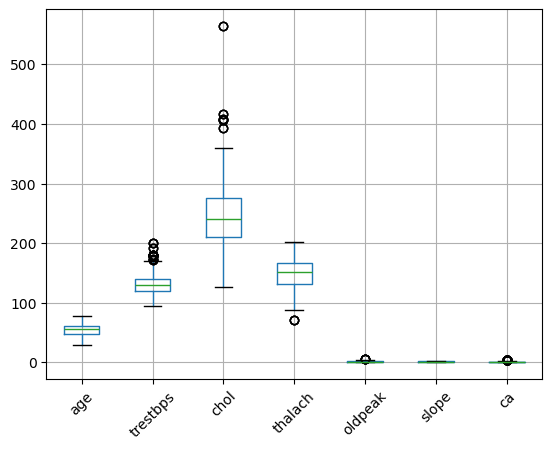

In [27]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [28]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [29]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

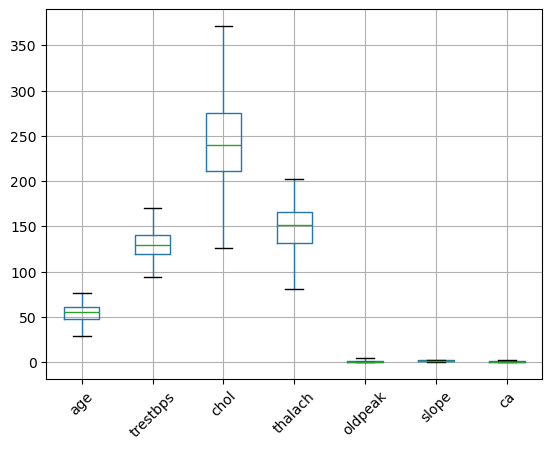

In [30]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [31]:
df = pd.concat([num_df,cat_df], axis = 1)

In [32]:
df

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,125,212,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,140,203,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,145,174,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,148,203,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,138,294,106,1.9,1,2.5,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0.0,1,1,0,1,1,2,1
1021,60,125,258,141,2.8,1,1.0,1,0,0,0,1,3,0
1022,47,110,275,118,1.0,1,1.0,1,0,0,0,1,2,0
1023,50,110,254,159,0.0,2,0.0,0,0,0,0,0,2,1


### Scaling

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler= StandardScaler()
min_max = MinMaxScaler()

In [35]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'sex',
       'cp', 'fbs', 'restecg', 'exang', 'thal', 'target'],
      dtype='object')

In [36]:
numerical_cols = ['trestbps','chol','thalach','oldpeak']

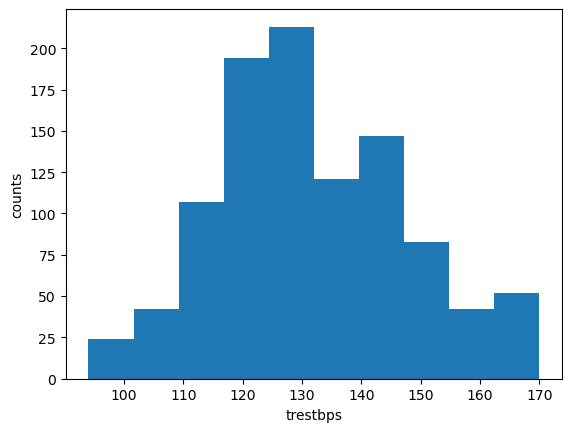

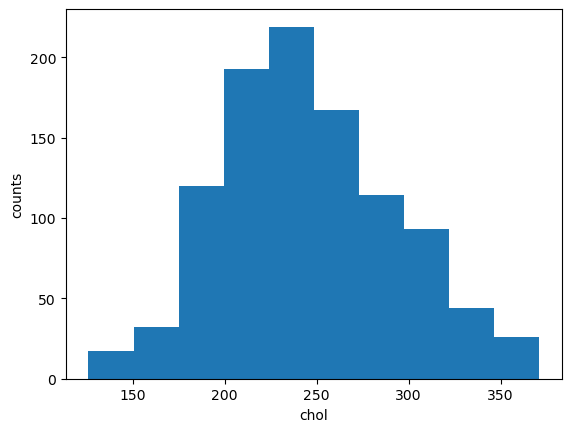

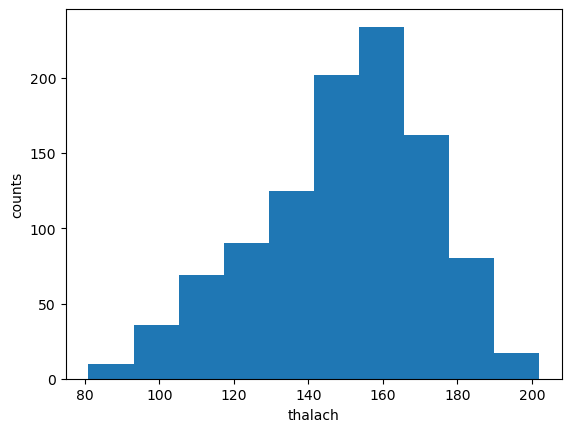

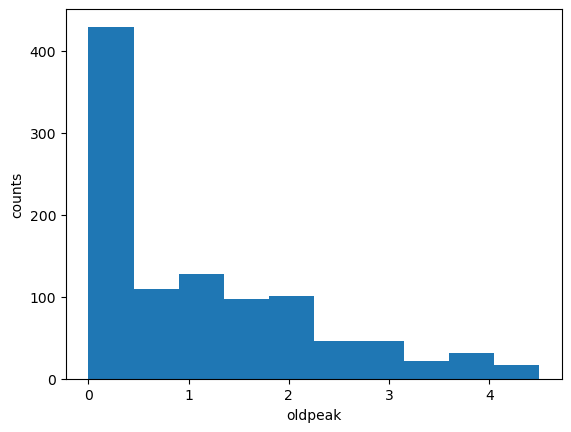

In [37]:
for col in numerical_cols :
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

- "trestbps", "chol" follows Gaussian distribution : standard scaling 
- 'thalach','oldpeak' follows Skewed distribution : min-max scaling

In [39]:
std_cols = ['trestbps','chol']

In [40]:
df[std_cols]= std_scaler.fit_transform(df[std_cols]) #Standard Scaling
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.378869,-0.691104,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,0.528894,-0.879693,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,0.831481,-1.487368,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,1.013034,-0.879693,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,0.407859,1.027150,106,1.9,1,2.5,0,0,1,1,0,2,0


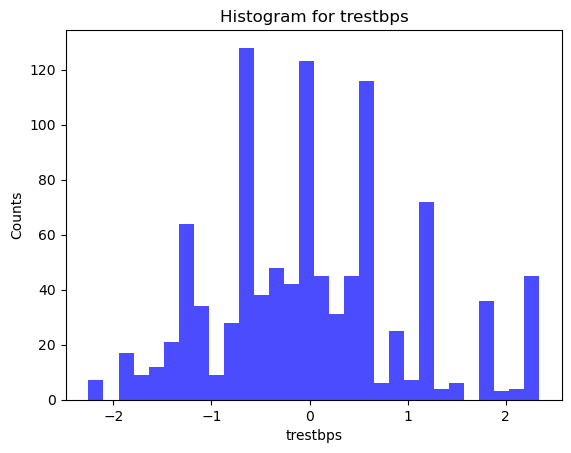

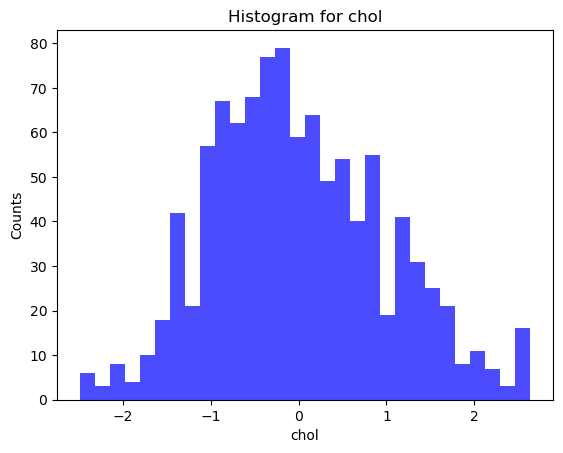

In [41]:
for col in std_cols:                                 # Histogram after standard scaling
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

In [42]:
min_cols = ['thalach','oldpeak']

In [43]:
df[min_cols] = min_max.fit_transform(df[min_cols])     #min-max scaling
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.378869,-0.691104,0.719008,0.222222,2,2.0,1,0,0,1,0,3,0
1,53,0.528894,-0.879693,0.611570,0.688889,0,0.0,1,0,1,0,1,3,0
2,70,0.831481,-1.487368,0.363636,0.577778,0,0.0,1,0,0,1,1,3,0
3,61,1.013034,-0.879693,0.661157,0.000000,2,1.0,1,0,0,1,0,3,0
4,62,0.407859,1.027150,0.206612,0.422222,1,2.5,0,0,1,1,0,2,0


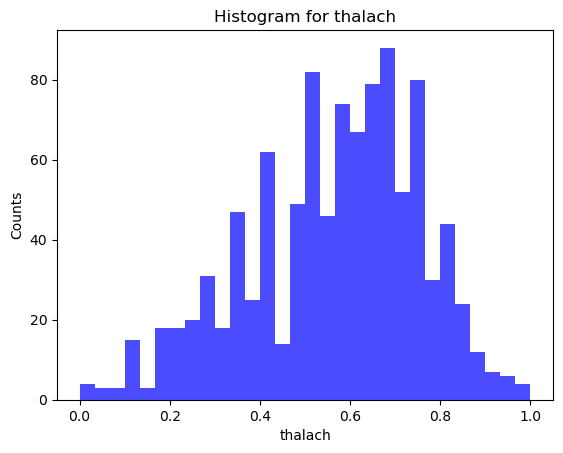

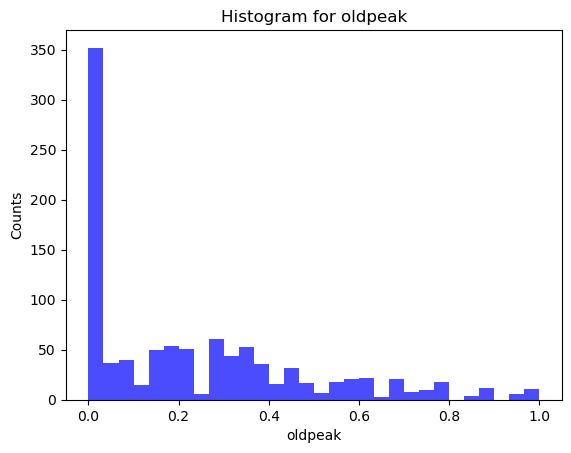

In [44]:
for col in min_cols:                          # Histogram after min-max scaling
    plt.hist(df[col], bins=30, color='blue', alpha=0.7)  # Accessing the column from the DataFrame
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

In [45]:
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.378869,-0.691104,0.719008,0.222222,2,2.0,1,0,0,1,0,3,0
1,53,0.528894,-0.879693,0.611570,0.688889,0,0.0,1,0,1,0,1,3,0
2,70,0.831481,-1.487368,0.363636,0.577778,0,0.0,1,0,0,1,1,3,0
3,61,1.013034,-0.879693,0.661157,0.000000,2,1.0,1,0,0,1,0,3,0
4,62,0.407859,1.027150,0.206612,0.422222,1,2.5,0,0,1,1,0,2,0


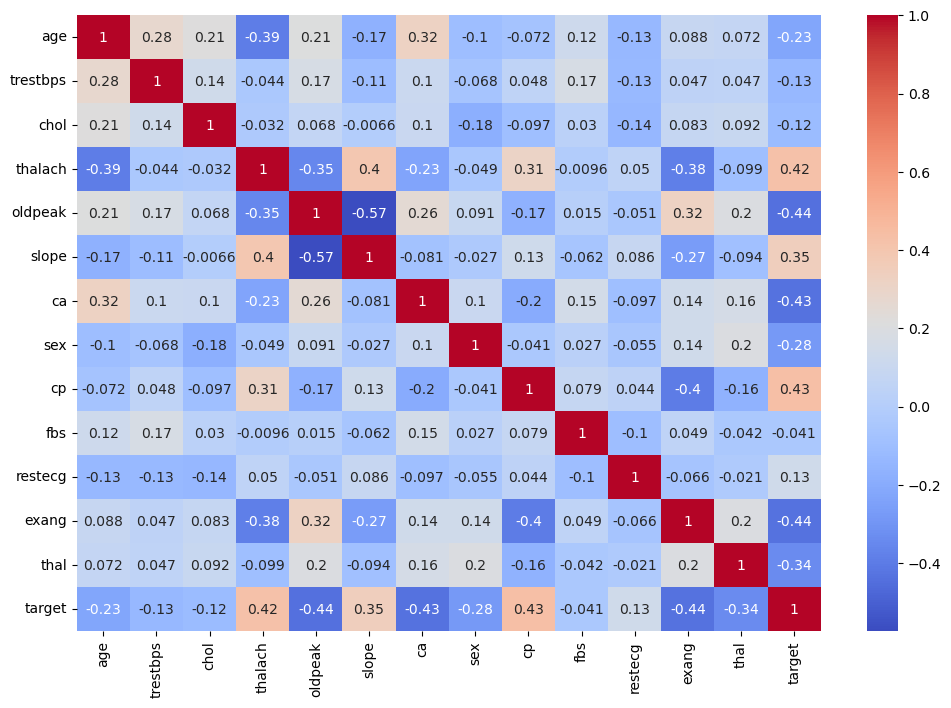

In [46]:
plt.figure(figsize=(12, 8)) # heatmap to check correlation
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm')
plt.show()

### Positive Correlation
- Older age is linked to higher CA levels.
- Higher thalach (heart rate) is associated with a positive target outcome.
- Chest pain (cp) increases the likelihood of a positive target outcome.
- cp, thalach, and slope together are strong indicators of the target outcome.

### Negative Correlation
- Older age is negatively correlated with thalach (heart rate).
- Higher oldpeak is linked to a lower likelihood of a positive target outcome.
- A steeper slope is associated with a lower oldpeak.
- CA is negatively correlated with a positive target outcome.
- Chest pain (cp) and exercise-induced angina (exang) are inversely related.
- Exang and target, as well as cp, are negatively correlated.
- Thalach, exang, sex, CA, and oldpeak are all negatively associated with a positive target outcome.

# Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y= df['chol']
X = df.drop("chol",axis = 1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

# Build Machine Learning Models & Evaluation

## Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.8111598117028646
R2 score : 0.15322134971896006


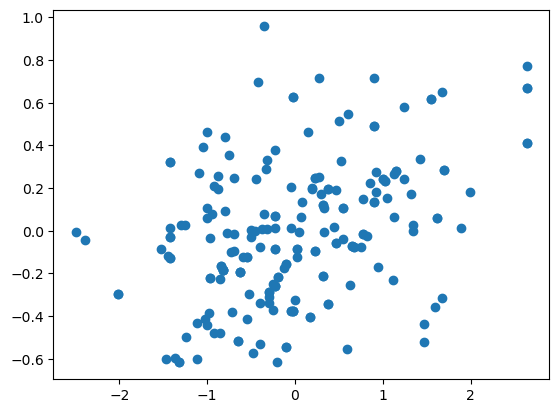

In [58]:
plt.scatter(y_test, y_pred)

## Classification


### 1. Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score

In [62]:
y= df['target']
X = df.drop("target",axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.827922077922078
precision: 0.8382513607282507
recall: 0.827922077922078
f1_score: 0.8284654149377736


### 2. K-Nearest Neighbors (KNN)

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

In [68]:
print('accuracy:',accuracy_score(y_pred_Knn,y_test))
print('precision:',precision_score(y_pred_Knn,y_test,average='weighted'))
print('recall:',recall_score(y_pred_Knn,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_Knn,y_test,average='weighted'))

accuracy: 0.8668831168831169
precision: 0.868113925667427
recall: 0.8668831168831169
f1_score: 0.8670506126176228


### 3. Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
nb_classifier = GaussianNB()

In [72]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [73]:
y_pred_NB = nb_classifier.predict(X_test)

In [74]:
print('accuracy:',accuracy_score(y_pred_NB,y_test))
print('precision:',precision_score(y_pred_NB,y_test,average='weighted'))
print('recall:',recall_score(y_pred_NB,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_NB,y_test,average='weighted'))

accuracy: 0.827922077922078
precision: 0.8402048122828166
recall: 0.827922077922078
f1_score: 0.8286039238923356


### Accuracy:

- K-Nearest Neighbors (KNN) has the highest accuracy at 86.7%, followed by Naive Bayes (82.8%) and Logistic Regression (82.1%).
- This suggests KNN performs better overall in correctly classifying instances.
  
### Precision:
- Precision measures how well the model avoids **false positives**.
- KNN has the highest precision (86.8%), indicating it is the best at ensuring positive predictions are correct.
- Naive Bayes and Logistic Regression follow closely at 84.0% and 83.3%, respectively.
- 
### Recall:
- Recall measures how well the model identifies all **positive instances**.
- KNN again leads at 86.7%, followed by Naive Bayes (82.8%) and Logistic Regression (82.1%).
  
### F1-Score:
- The F1-score balances **precision and recall**.
- KNN has the highest F1-score (86.7%), making it the most balanced model for this task.
- Naive Bayes (82.9%) and Logistic Regression (82.2%) are close but slightly less balanced.


# Findings

Insights from the Data:
- 51.32% of patients have heart disease; 48.68% do not. Heart disease is slightly more common.
- More males in the dataset (713 males vs. 312 females).
- Females: 72.4% have heart disease, 27.6% do not.
- Males: 42.1% have heart disease, 57.9% do not.
- Females are more likely to have heart disease than males.



# Recommendations:
- Focus on targeted heart health programs, especially for women.
- Promote lifestyle awareness for both genders.
- Allocate resources for cardiovascular care and early diagnosis programs.
  